In [1]:
# Step 0: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

sns.set(style="whitegrid")

In [2]:
# Load dataset (update the path if needed)
file_path = 'MLPC dataset.csv'
df = pd.read_csv(file_path, sep='\t', encoding='ISO-8859-1')

print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nData types and missing values:")
print(df.info())

/tmp/ipython-input-2-516615352.py:3: DtypeWarning: Columns (13,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep='\t', encoding='ISO-8859-1')


Shape of dataset: (100230, 47)

First 5 rows:
   _id  OBJECTID         * Damage  * Street Number  * Street Name  \
0    1         1        No Damage           8376.0   Quail Canyon   
1    2         2  Affected (1-9%)           8402.0   Quail Canyon   
2    3         3        No Damage           8430.0  Quail Canyon    
3    4         4        No Damage           3838.0    Putah Creek   
4    5         5        No Damage           3830.0    Putah Creek   

  * Street Type (e.g. road, drive, lane, etc.)  \
0                                         Road   
1                                         Road   
2                                         Road   
3                                         Road   
4                                         Road   

  Street Suffix (e.g. apt. 23, blding C)   * City State  Zip Code  ...  \
0                                    NaN  Winters    CA       NaN  ...   
1                                    NaN  Winters    CA       NaN  ...   
2               

In [3]:
# Columns to keep
selected_columns = [
    '* Damage', '* Street Number', '* Street Name', '* Street Type (e.g. road, drive, lane, etc.)',
    '* City', 'State', 'Zip Code', 'County', 'Incident Start Date', 'Hazard Type',
    '* Structure Type', '* Roof Construction', '* Exterior Siding', '* Window Pane',
    '* Deck/Porch On Grade', '* Deck/Porch Elevated', 'Latitude', 'Longitude'
]

df_clean = df[selected_columns].copy()

# Check missing values
print("Missing values before cleaning:")
print(df_clean.isnull().sum())

# Identify numeric & categorical columns
numeric_cols = ['* Street Number', 'Zip Code', 'Latitude', 'Longitude']
categorical_cols = [col for col in df_clean.columns if col not in numeric_cols and col != '* Damage']

# Fill missing values
for col in numeric_cols:
    df_clean[col].fillna(df_clean[col].median(), inplace=True)
for col in categorical_cols:
    df_clean[col].fillna('Unknown', inplace=True)

# Encode target variable
le_target = LabelEncoder()
df_clean['* Damage'] = le_target.fit_transform(df_clean['* Damage'])

# Encode categorical features
for col in categorical_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])

print("\nMissing values after cleaning:")
print(df_clean.isnull().sum())

Missing values before cleaning:
* Damage                                            0
* Street Number                                  4420
* Street Name                                    5486
* Street Type (e.g. road, drive, lane, etc.)    13197
* City                                          31614
State                                               7
Zip Code                                        52801
County                                             30
Incident Start Date                                 0
Hazard Type                                         0
* Structure Type                                    0
* Roof Construction                               628
* Exterior Siding                                 909
* Window Pane                                     976
* Deck/Porch On Grade                               0
* Deck/Porch Elevated                               0
Latitude                                            0
Longitude                                         

/tmp/ipython-input-3-2500186729.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].median(), inplace=True)
/tmp/ipython-input-3-2500186729.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac


Missing values after cleaning:
* Damage                                        0
* Street Number                                 0
* Street Name                                   0
* Street Type (e.g. road, drive, lane, etc.)    0
* City                                          0
State                                           0
Zip Code                                        0
County                                          0
Incident Start Date                             0
Hazard Type                                     0
* Structure Type                                0
* Roof Construction                             0
* Exterior Siding                               0
* Window Pane                                   0
* Deck/Porch On Grade                           0
* Deck/Porch Elevated                           0
Latitude                                        0
Longitude                                       0
dtype: int64


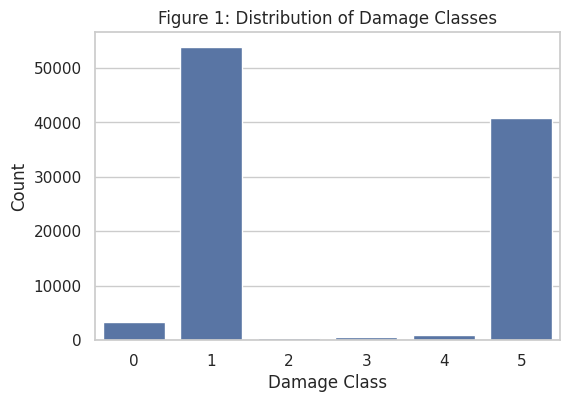

In [4]:
plt.figure(figsize=(6,4))
sns.countplot(x='* Damage', data=df_clean)
plt.title('Figure 1: Distribution of Damage Classes')
plt.xlabel('Damage Class')
plt.ylabel('Count')
plt.show()

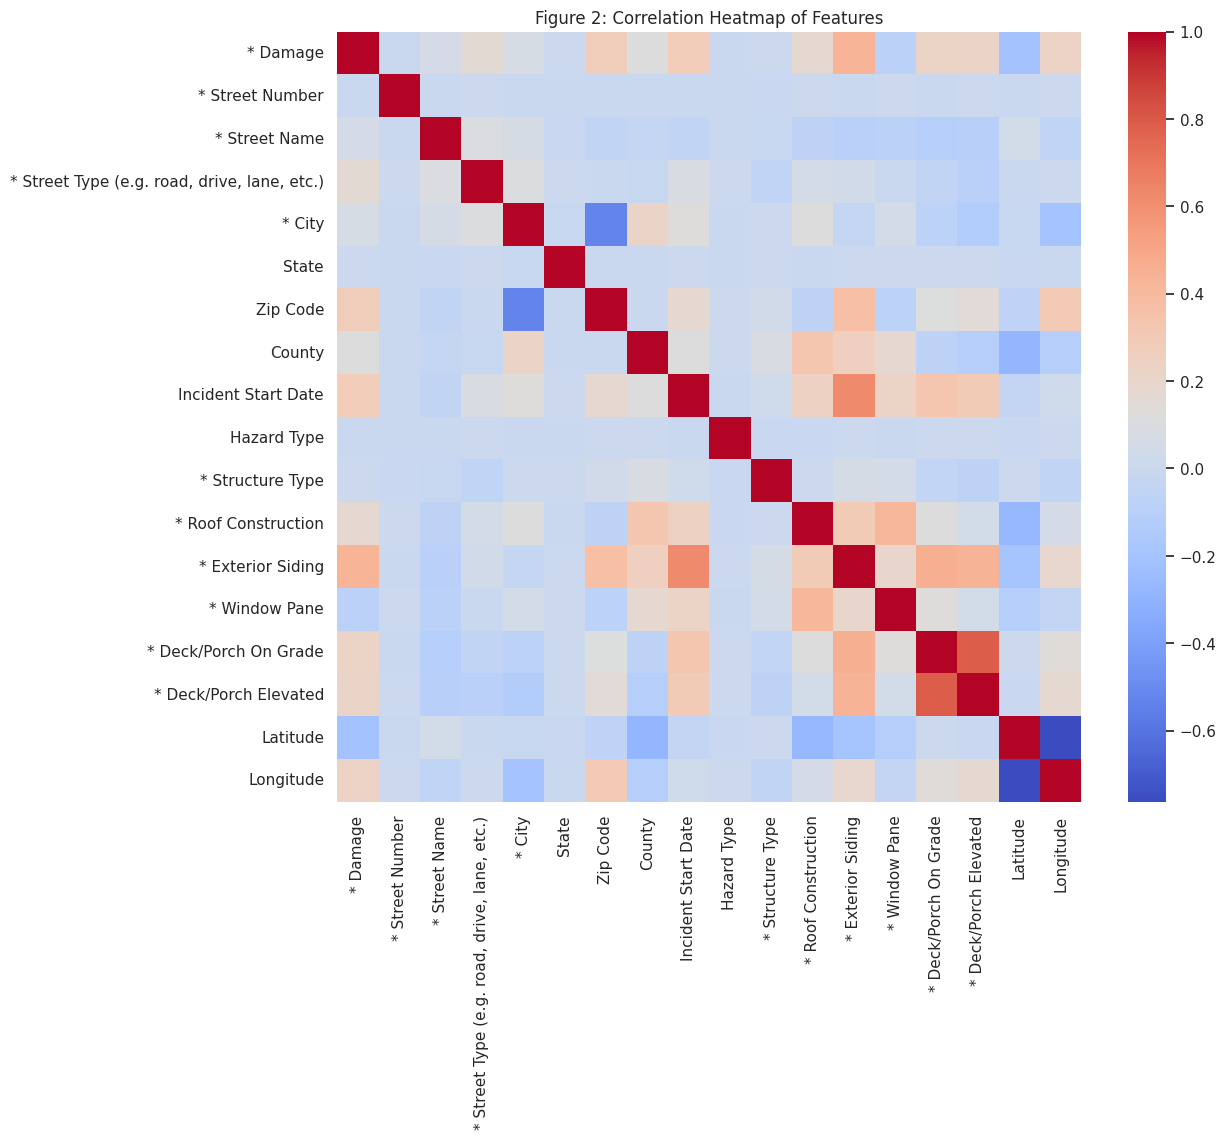

In [5]:
plt.figure(figsize=(12,10))
corr = df_clean.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Figure 2: Correlation Heatmap of Features')
plt.show()

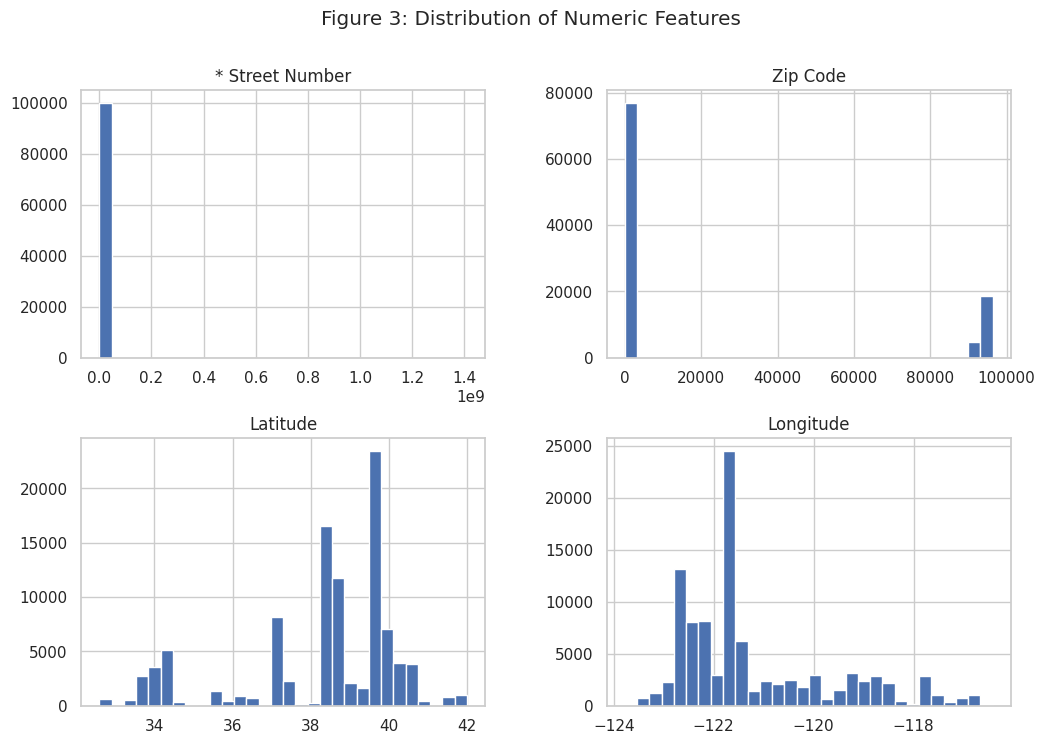

In [6]:
df_clean[numeric_cols].hist(bins=30, figsize=(12,8))
plt.suptitle('Figure 3: Distribution of Numeric Features')
plt.show()

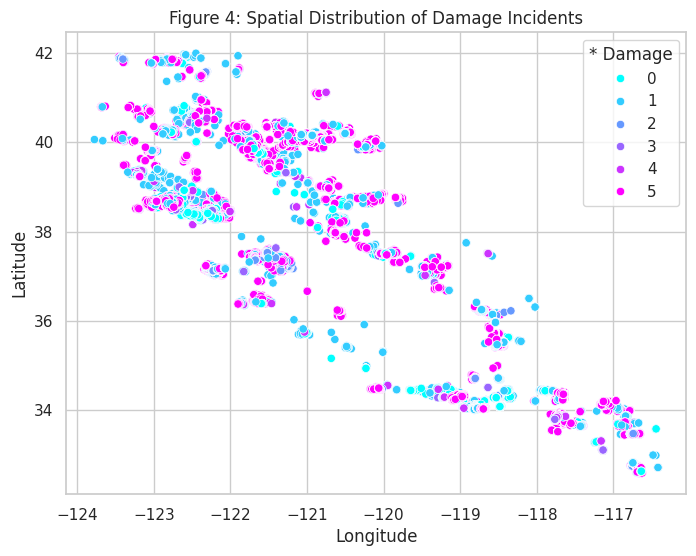

In [7]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Longitude', y='Latitude', hue='* Damage', data=df_clean, palette='cool')
plt.title('Figure 4: Spatial Distribution of Damage Incidents')
plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder

# Identify numeric and categorical columns
numeric_cols = ['* Street Number', 'Zip Code', 'Latitude', 'Longitude']
categorical_cols = [col for col in df_clean.columns if col not in numeric_cols and col != '* Damage']

# Fill missing numeric with median
for col in numeric_cols:
    df_clean[col].fillna(df_clean[col].median(), inplace=True)

# Fill missing categorical with 'Unknown'
for col in categorical_cols:
    df_clean[col].fillna('Unknown', inplace=True)

# Check again
print(df_clean.isnull().sum())

* Damage                                        0
* Street Number                                 0
* Street Name                                   0
* Street Type (e.g. road, drive, lane, etc.)    0
* City                                          0
State                                           0
Zip Code                                        0
County                                          0
Incident Start Date                             0
Hazard Type                                     0
* Structure Type                                0
* Roof Construction                             0
* Exterior Siding                               0
* Window Pane                                   0
* Deck/Porch On Grade                           0
* Deck/Porch Elevated                           0
Latitude                                        0
Longitude                                       0
dtype: int64


/tmp/ipython-input-8-640770314.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].median(), inplace=True)
/tmp/ipython-input-8-640770314.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [9]:
# Encode target
le_target = LabelEncoder()
df_clean['* Damage'] = le_target.fit_transform(df_clean['* Damage'])

# Encode other categorical features
for col in categorical_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])

In [10]:
from sklearn.model_selection import train_test_split

X = df_clean.drop(columns=['* Damage'])
y = df_clean['* Damage']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
print('Train shape:', X_train.shape)
print('Test shape:', X_test.shape)

Train shape: (80184, 17)
Test shape: (20046, 17)


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

# Train
start = time.time()
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
rf_time = time.time() - start

# Predict
rf_preds = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_preds)

print(f'RandomForest CPU - Time: {rf_time:.2f}s, Accuracy: {rf_acc:.4f}')

RandomForest CPU - Time: 26.95s, Accuracy: 0.9094


In [13]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# Convert data to tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Dataset
train_ds = TensorDataset(X_train_tensor, y_train_tensor)
train_dl = DataLoader(train_ds, batch_size=64, shuffle=True)

# Model
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, output_dim=None):
        super().__init__()
        if output_dim is None:
            output_dim = len(torch.unique(y_train_tensor))
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )
    def forward(self, x):
        return self.net(x)

# Training on CPU
device_cpu = torch.device('cpu')
model_cpu = MLP(input_dim=X_train.shape[1]).to(device_cpu)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_cpu.parameters(), lr=0.001)

start = time.time()
model_cpu.train()
for epoch in range(5):  # few epochs to keep fast
    for xb, yb in train_dl:
        xb, yb = xb.to(device_cpu), yb.to(device_cpu)
        optimizer.zero_grad()
        preds = model_cpu(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
cpu_time = time.time() - start

# Evaluate
model_cpu.eval()
with torch.no_grad():
    preds = model_cpu(X_test_tensor).argmax(dim=1)
    cpu_acc = (preds == y_test_tensor).float().mean().item()

print(f'MLP CPU - Time: {cpu_time:.2f}s, Accuracy: {cpu_acc:.4f}')

MLP CPU - Time: 12.99s, Accuracy: 0.6900


In [14]:
device_gpu = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_gpu = MLP(input_dim=X_train.shape[1]).to(device_gpu)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_gpu.parameters(), lr=0.001)

train_dl_gpu = DataLoader(train_ds, batch_size=64, shuffle=True)

start = time.time()
model_gpu.train()
for epoch in range(5):
    for xb, yb in train_dl_gpu:
        xb, yb = xb.to(device_gpu), yb.to(device_gpu)
        optimizer.zero_grad()
        preds = model_gpu(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
gpu_time = time.time() - start

# Evaluate
model_gpu.eval()
with torch.no_grad():
    preds = model_gpu(X_test_tensor.to(device_gpu)).argmax(dim=1).cpu()
    gpu_acc = (preds == y_test_tensor).float().mean().item()

print(f'MLP GPU - Time: {gpu_time:.2f}s, Accuracy: {gpu_acc:.4f}')


MLP GPU - Time: 14.57s, Accuracy: 0.5728


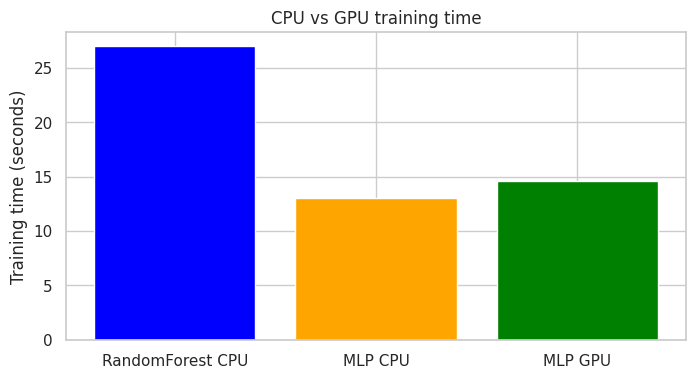

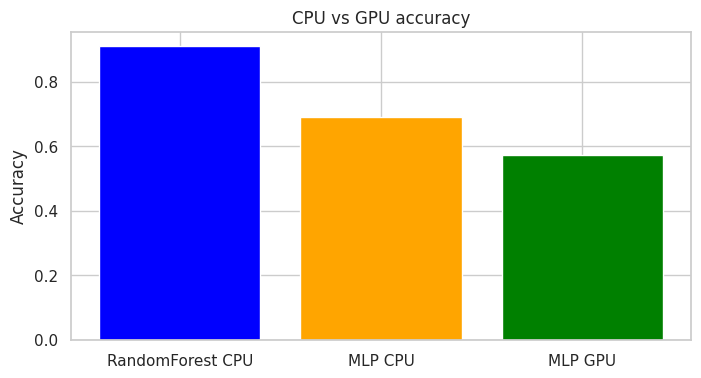

In [15]:
import matplotlib.pyplot as plt

# Bar chart: training time
plt.figure(figsize=(8,4))
plt.bar(['RandomForest CPU', 'MLP CPU', 'MLP GPU'],
        [rf_time, cpu_time, gpu_time],
        color=['blue', 'orange', 'green'])
plt.ylabel('Training time (seconds)')
plt.title('CPU vs GPU training time')
plt.show()

# Bar chart: accuracy
plt.figure(figsize=(8,4))
plt.bar(['RandomForest CPU', 'MLP CPU', 'MLP GPU'],
        [rf_acc, cpu_acc, gpu_acc],
        color=['blue', 'orange', 'green'])
plt.ylabel('Accuracy')
plt.title('CPU vs GPU accuracy')
plt.show()